# Projeto 2 - Ciência dos Dados
## 2020.2 ~ 2C ~ Estudo do stat "Velocidade" dos Pokémons
### Grupo:
    -Guilherme Rameh
    -Tales Oliveira
    -Gabriella Zullo
    -João Magalhães

In [2]:
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [3]:
# Leitura do banco de dados

dados = pd.read_csv('pokemon.csv')
dados

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


# Primeira Análise Exploratória
A seguir, verificaremos quais variáveis achamos interessantes de se relacionar com a velocidade dos Pokémons, que é nossa variável *Target*. Começamos printando as colunas do dataframe, pois sabendo do que se trata, podemos descartar algumas colunas logo de cara (como por exemplo as colunas referentes a quanto de dano cada ataque dá em cada tipo de Pokémon).

In [4]:
print(dados.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

<b> Lembrete: Quando lidando com duas variáveis QUANTITATIVAS, usamos scatter plot, e para variáveis QUALITATÍVAS (como estamos lidando com "speed", que é quantitativo) podemos separar por index e fazer crosstab, ou usar o comando pivot table do pandas, que permite a análise de várias variáveis qualitativas em relação a quantitativas, permitindo até o uso de comandos como média, máx e mín.

### Primeiras modificações no Dataframe

A seguir, manipulamos o dataframe com o intuito de analisar a relação da velocidade com as principais variáveis quantitativas, como ataque, defesa, etc...; Para evitar confusões e dificuldade na leitura dos gráficos, primeiro separamos os tipos de pokémons nos mais frequentes, tanto para o *tipo 1* quanto para o *tipo 2*. Nessa etapa também separamos o dataframe em dois, um de treino e um para testarmos o quão fíel é o nosso modelo.

In [5]:
for i in dados.index:
    type1 = dados.type1[i]
    if type1 == 'water':
        dados.loc[dados.index==i, 'Type1Reorder'] = 'water'
    elif type1 == 'normal':
        dados.loc[dados.index==i, 'Type1Reorder'] = 'normal'
    else:
        dados.loc[dados.index==i, 'Type1Reorder'] = 'other'
        
    type2 = dados.type2[i]
    if type2 == 'flying':
        dados.loc[dados.index==i, 'Type2Reorder'] = 'flying'
    elif type2 == 'ground':
        dados.loc[dados.index==i, 'Type2Reorder'] = 'ground'
    else:
        dados.loc[dados.index==i, 'Type2Reorder'] = 'other'
        
dados.tail(20)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Type1Reorder,Type2Reorder
781,"['Bulletproof', 'Soundproof', 'Overcoat']",1.00,1.0,2.0,0.5,2.0,1.00,0.5,1.0,1.0,...,45,45,45,dragon,NaN,29.7,7,0,other,other
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,65,70,65,dragon,fighting,47.0,7,0,other,other
783,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,100,105,85,dragon,fighting,78.2,7,0,other,other
784,"['Electric Surge', 'Telepathy']",0.50,0.5,0.0,0.5,1.0,0.50,1.0,0.5,1.0,...,95,75,130,electric,fairy,20.5,7,1,other,other
785,"['Psychic Surge', 'Telepathy']",1.00,1.0,0.0,1.0,1.0,0.25,1.0,1.0,2.0,...,130,115,95,psychic,fairy,18.6,7,1,other,other
786,"['Grassy Surge', 'Telepathy']",1.00,0.5,0.0,0.5,1.0,0.50,2.0,2.0,1.0,...,85,95,75,grass,fairy,45.5,7,1,other,other
787,"['Misty Surge', 'Telepathy']",0.50,0.5,0.0,2.0,1.0,0.50,0.5,1.0,1.0,...,95,130,85,water,fairy,21.2,7,1,water,other
788,['Unaware'],2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,29,31,37,psychic,NaN,0.1,7,1,other,other
789,['Sturdy'],2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,29,131,37,psychic,NaN,999.9,7,1,other,other
790,['Full Metal Body'],1.00,2.0,0.5,1.0,0.5,1.00,2.0,0.5,2.0,...,113,89,97,psychic,steel,230.0,7,1,other,other


In [6]:
lista_train_test = train_test_split(dados, shuffle=True)
train = lista_train_test[0]
test = lista_train_test[1]

# size = 600
# list_of_dfs = [shuffle.iloc[:600,:], shuffle.iloc[600:,:]]
# train = list_of_dfs[0]
# test = list_of_dfs[1]

In [7]:
# Aqui vemos a quantidade de cada tipo, 1 e 2, na base de treino

print(train['type1'].value_counts())
print('\n')
print(train['type2'].value_counts())

water       85
normal      77
grass       53
bug         52
fire        43
psychic     40
rock        32
ground      27
electric    26
poison      25
fighting    25
ghost       23
dragon      22
dark        22
steel       19
ice         18
fairy        9
flying       2
Name: type1, dtype: int64


flying      69
poison      26
ground      24
fairy       23
fighting    21
psychic     20
dark        17
steel       16
grass       14
dragon      14
water       13
rock        10
ice          9
ghost        9
fire         9
electric     7
bug          4
normal       3
Name: type2, dtype: int64


### Análise com o modelo de distribuição "Normal"

Na célula seguinte, usamos o *probplot* e um histograma para analisar a normalidade da variável 'velocidade'. Podemos ver que ela não se distancia tanto da normal, principalmente na cauda esquerda.

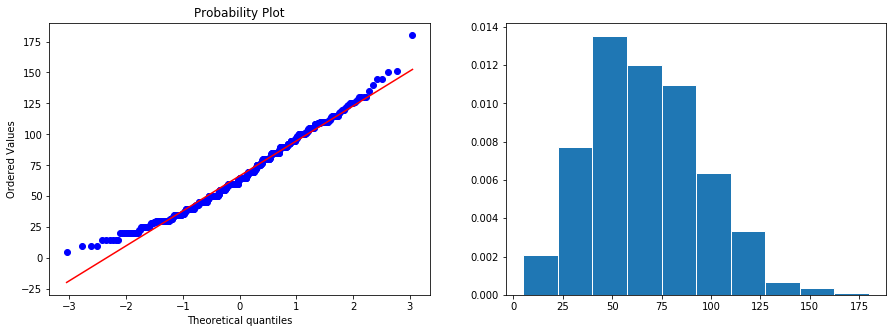

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)
probplot(train['speed'], dist='norm', plot=plt)

plt.subplot(122)
plt.hist(train['speed'], density=True, edgecolor='w');

## Plot inicial
Como maneira de visualizar melhor se as variáveis tem relação ao *Target*, plotamos os gráficos *scatterplot* de relação entre as diversas variáveis quantitativas, além de separar por tipos de Pokémon, para ver se com isso conseguíamos visualizar alguma relação, que como se perceberá logo, é bem difícil.

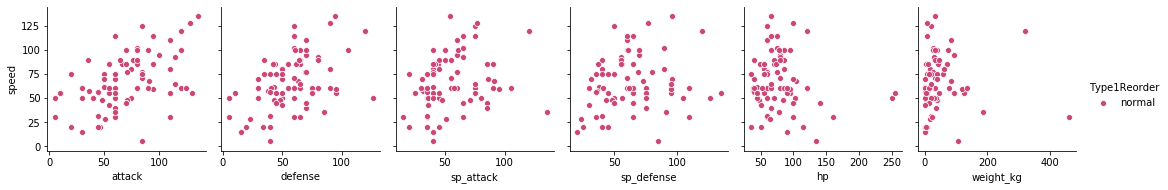

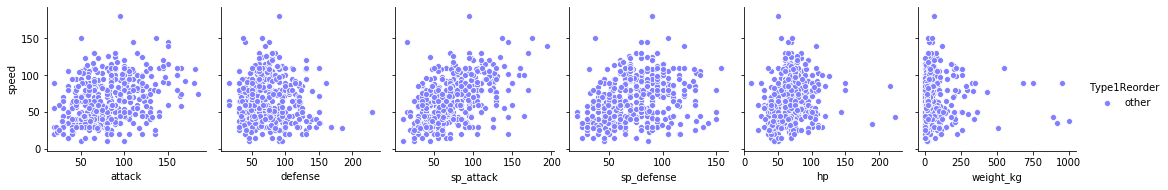

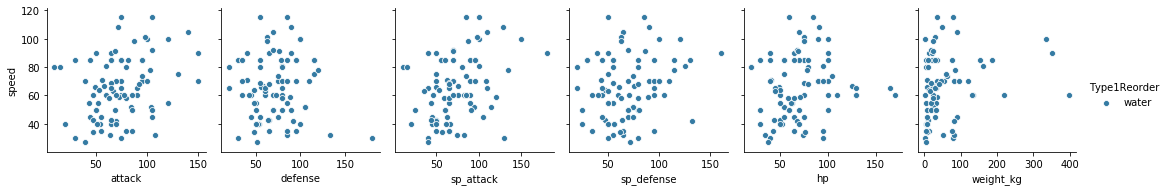

In [9]:
listType1 = train.Type1Reorder.unique()
listType2 = train.Type2Reorder.unique()
colorlist = ['plasma', 'cool', 'mako']

for i in range(3):
    e = listType1[i]
    df = train.loc[train.Type1Reorder==e, :]
    sns.pairplot(df, palette=colorlist[i],
        x_vars=["attack", 'defense', 'sp_attack', 'sp_defense', 'hp', 'weight_kg'],
        y_vars=['speed'],
        hue='Type1Reorder', height=2.5);

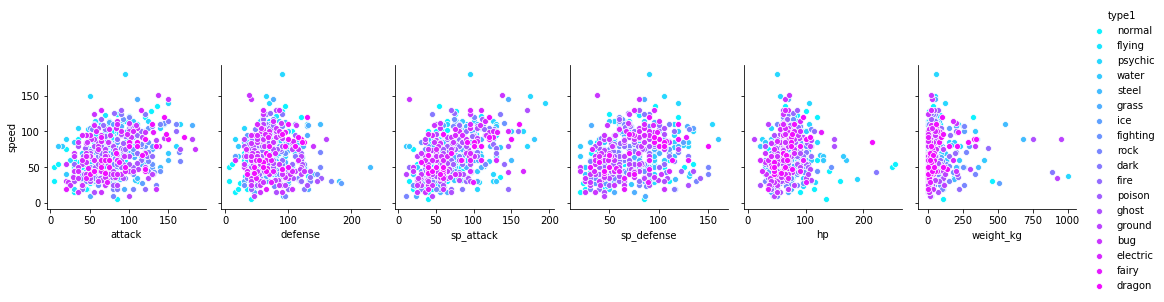

In [10]:
sns.pairplot(train,
        x_vars=["attack", 'defense', 'sp_attack', 'sp_defense', 'hp', 'weight_kg'],
        y_vars=['speed'], palette='cool',hue='type1', height=2.5);

## Regressão
Percebendo que assim não conseguiríamos identificar nenhuma relação, optamos por usar a biblioteca <b>statsmodel.api</b> para fazer a regressão pelo método dos Mínimos Quadrados. 

*Usamos apenas algumas variáveis, pois no contexto do dataframe e do jogo Pokémon sabemos que fazem referência a outros detalhes que não vão influenciar na velocidade do Pokémon, além de alguns conterem termos NaN, que atrapalham o uso deles como treino*

In [11]:
X = train[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'is_legendary', 'generation', 'experience_growth']]

Y = train[['speed']]

In [12]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [13]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.55e-49
Time:                        22:15:23   Log-Likelihood:                -2733.1
No. Observations:                 600   AIC:                             5484.
Df Residuals:                     591   BIC:                             5524.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                46.8692      7.407      6.327      0.000      32.321      61.417
attack                0.3226      0.037      8.759      0.000       0.250       0.395
defense              -0.3210      0.042     -7.723      0.000      -0.403      -0.239
sp_attack             0.2543      0.037      6.835      0.000       0.181       0.327
sp_defense            0.1626      0.049      3.325      0.001       0.067       0.259
hp                   -0.1273      0.039     -3.249      0.001      -0.204      -0.050
is_legendary         19.2016      3.942      4.872      0.000      11.460      26.943
generation           -0.8263      0.495     -1.671      0.095      -1.798       0.145
experience_growth -1.776e-06   6.25e-06     -0.284      0.776   -1.41e-05    1.05e-05
==============================================================================
Omnibus:                       10.222   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.263
Skew:                           0.297   Prob(JB):                      0.00591
Kurtosis:                       3.238   Cond. No.                     8.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Analisando os resultados acima, percebemos que TODOS (com excessão de "experience_growth") são importantes para definir nossa variável *Target*, ou seja, a velocidade ("speed"). Apesar disso, nosso P é bem pequeno, o que não é um bom sinal, e portanto precisaremos de mais regressões se quisermos atingir a normalidade e poder prever fielmente nosso *Target*.

## Análise Rápida da previsão "como está"
Apenas para visualizarmos, abaixo segue o plot do predict (ou seja, a previsão que a biblioteca $sm$ faz) relacionado com os valores reais do nosso dataframe *teste*.

In [14]:
X_test = test[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'is_legendary', 'generation', 'experience_growth']]

Y_test = test[['speed']]

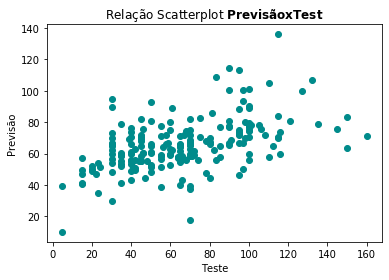

In [15]:
X_cp = sm.add_constant(X_test)
Y_predTest = results.predict(X_cp)

plt.title(r'Relação Scatterplot $\bf{Previsão x Test}$')
plt.xlabel('Teste')
plt.ylabel('Previsão')
plt.scatter(Y_test, Y_predTest, color='darkcyan');

## Aprofundamento na Análise Exploratória
Para aprimorarmos nossa previsão da velocidade dos Pokémons, precisamos também considerar variáveis <b>qualitativas</b>. Porém, a biblioteca $sm$ lida apenas com variáveis <b>quantitativas</b>. Como podemos então transformar essas variáveis para podermos analisar melhor nosso dataframe? A resposta é: com $Dummies$. Dummies é um comando da biblioteca $pandas$ que transforma as strings de uma classificação qualitativa em colunas de um dataframe assumindo valores de 0 ou 1, que equivalem a False e True, respectivamente. Assim, podemos usar essas novas colunas para uma análise exploratória mais aprofundada.

### Type 1

In [16]:
dummies_type1 = pd.get_dummies(train['type1'])
dummies_type2 = pd.get_dummies(train['type2'])

In [17]:
X_Type1 = dummies_type1 
X_Type2 = dummies_type2

In [18]:
results = regress(Y,X_Type1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.506
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           0.000755
Time:                        22:15:23   Log-Likelihood:                -2837.5
No. Observations:                 600   AIC:                             5711.
Df Residuals:                     582   BIC:                             5790.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.1919      1.571     41.504      0.000      62.107      68.277
bug           -1.0188      3.972     -0.257      0.798      -8.820       6.782
dark           4.9899      5.824      0.857      0.392      -6.450      16.429
dragon         6.9899      5.824      1.200      0.231      -4.450      18.429
electric      19.3081      5.393      3.580      0.000       8.716      29.900
fairy        -10.8586      8.908     -1.219      0.223     -28.355       6.638
fighting      -0.9119      5.491     -0.166      0.868     -11.696       9.872
fire           8.7151      4.308      2.023      0.044       0.253      17.177
flying        56.8081     18.668      3.043      0.002      20.143      93.473
ghost         -2.8441      5.706     -0.498      0.618     -14.051       8.362
grass         -5.5127      3.940     -1.399      0.162     -13.251       2.226
ground        -3.9326      5.301     -0.742      0.458     -14.344       6.478
ice           -1.0808      6.396     -0.169      0.866     -13.644      11.482
normal         2.1977      3.384      0.649      0.516      -4.450       8.845
poison        -1.1919      5.491     -0.217      0.828     -11.976       9.592
psychic       11.1331      4.446      2.504      0.013       2.401      19.866
rock          -9.1294      4.909     -1.860      0.063     -18.770       0.511
steel         -8.6656      6.236     -1.390      0.165     -20.914       3.583
water          0.1963      3.257      0.060      0.952      -6.201       6.594
==============================================================================
Omnibus:                       16.767   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.759
Skew:                           0.420   Prob(JB):                     0.000139
Kurtosis:                       2.937   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Analisando a regressão da variável Tipo 1
Analisando essa primeira tabela da regressão, percebe-se uma forte relação dos tipos electric, fire e flying com a velocidade. Seguimos aprofundando na análise. 

In [19]:
X_Type1 = dummies_type1.loc[:, ['electric', 'fire', 'flying']]
results = regress(Y,X_Type1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     7.961
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.28e-05
Time:                        22:15:23   Log-Likelihood:                -2846.9
No. Observations:                 600   AIC:                             5702.
Df Residuals:                     596   BIC:                             5719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7221      1.214     53.323      0.000      62.338      67.106
electric      19.7779      5.608      3.527      0.000       8.764      30.791
fire           9.1849      4.427      2.075      0.038       0.491      17.879
flying        57.2779     19.778      2.896      0.004      18.436      96.120
==============================================================================
Omnibus:                       19.497   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.778
Skew:                           0.456   Prob(JB):                     3.08e-05
Kurtosis:                       3.022   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Type 2

In [20]:
results = regress(Y,X_Type2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.662
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           5.95e-07
Time:                        22:15:23   Log-Likelihood:                -2826.4
No. Observations:                 600   AIC:                             5691.
Df Residuals:                     581   BIC:                             5774.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.1541      1.599     39.491      0.000      60.013      66.295
bug          -15.9041     13.757     -1.156      0.248     -42.923      11.115
dark          12.0224      6.818      1.763      0.078      -1.369      25.413
dragon         7.1316      7.477      0.954      0.341      -7.553      21.816
electric       0.1316     10.452      0.013      0.990     -20.396      20.660
fairy          4.4546      5.918      0.753      0.452      -7.169      16.078
fighting      19.9887      6.174      3.238      0.001       7.863      32.115
fire           8.4014      9.248      0.908      0.364      -9.763      26.566
flying        19.3386      3.658      5.287      0.000      12.154      26.523
ghost         -2.1541      9.248     -0.233      0.816     -20.319      16.010
grass         -9.0827      7.477     -1.215      0.225     -23.767       5.602
ground        -5.4458      5.803     -0.938      0.348     -16.843       5.951
ice            5.4014      9.248      0.584      0.559     -12.763      23.566
normal        32.5126     15.858      2.050      0.041       1.366      63.659
poison         5.5767      5.593      0.997      0.319      -5.408      16.561
psychic        9.5959      6.316      1.519      0.129      -2.810      22.002
rock         -24.9541      8.788     -2.839      0.005     -42.215      -7.693
steel         -0.3416      7.017     -0.049      0.961     -14.122      13.439
water        -12.3080      7.746     -1.589      0.113     -27.522       2.906
==============================================================================
Omnibus:                       23.704   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.506
Skew:                           0.499   Prob(JB):                     2.89e-06
Kurtosis:                       3.154   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analisando a regressão da variável Tipo 2
Analisando essa tabela da regressão, percebe-se uma forte relação dos tipos2 fighting, flying, e rock com a velocidade. Seguimos aprofundando na análise. 

In [21]:
X_Type2 = dummies_type2.loc[:, ['fighting', 'flying', 'rock']]
results = regress(Y,X_Type2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     15.24
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.45e-09
Time:                        22:15:24   Log-Likelihood:                -2836.5
No. Observations:                 600   AIC:                             5681.
Df Residuals:                     596   BIC:                             5699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0740      1.227     52.217      0.000      61.664      66.484
fighting      19.0689      6.112      3.120      0.002       7.065      31.072
flying        18.4188      3.524      5.227      0.000      11.498      25.339
rock         -25.8740      8.763     -2.953      0.003     -43.084      -8.664
==============================================================================
Omnibus:                       23.320   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.188
Skew:                           0.500   Prob(JB):                     3.39e-06
Kurtosis:                       3.079   Cond. No.                         7.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regressão Aprofundada
Agora que temos alguma noção de quais variáveis importam para nós e quais não, podemos fazer uma regressão apenas com essas variáveis, e ver se conseguimos usar esse modelo para prever com mais precisão a base de *teste*.

In [22]:
# Type1 importantes: electric, fire, flying
# Type2 importantes: fighting, flying, rock

Type1Imp = ['electric', 'fire', 'flying']
Type2Imp = ['fighting', 'flying', 'rock']

# Usaremos essas listas para criar colunas personalizadas no dataframe Train para poder diferenciar type1 de type2
# Assim, já podemos aproveitar e usar os dataframse de Dummies para isso

for i in range(3):
    train.loc[:,'T1_'+Type1Imp[i]] = dummies_type1[Type1Imp[i]]
    train.loc[:,'T2_'+Type2Imp[i]] = dummies_type2[Type2Imp[i]]
    
train

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,generation,is_legendary,Type1Reorder,Type2Reorder,T1_electric,T2_fighting,T1_fire,T2_flying,T1_flying,T2_rock
660,"['Big Pecks', 'Gale Wings']",0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,...,6,0,normal,flying,0,0,0,1,0,0
714,"['Frisk', 'Infiltrator', 'Telepathy']",0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,6,0,other,other,0,0,0,0,1,0
200,['Levitate'],2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,2,0,other,other,0,0,0,0,0,0
396,"['Intimidate', 'Reckless']",0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,...,4,0,normal,flying,0,0,0,1,0,0
294,"['Soundproof', 'Scrappy']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,3,0,normal,other,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,"['Keen Eye', 'Big Pecks', 'Hydration']",0.5,1.0,1.0,4.0,1.0,0.5,0.5,1.0,1.0,...,5,0,water,flying,0,0,0,1,0,0
518,"['Big Pecks', 'Super Luck', 'Rivalry']",0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,...,5,0,normal,flying,0,0,0,1,0,0
32,"['Poison Point', 'Rivalry', 'Hustle']",0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,...,1,0,other,other,0,0,0,0,0,0
602,['Levitate'],1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,5,0,other,other,1,0,0,0,0,0


In [23]:
X_comp = train[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'is_legendary', 'generation',
                'T1_electric', 'T2_fighting', 'T1_fire', 'T2_flying', 'T1_flying', 'T2_rock']]

In [24]:
results = regress(Y,X_comp)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     29.48
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           7.93e-56
Time:                        22:15:28   Log-Likelihood:                -2707.7
No. Observations:                 600   AIC:                             5443.
Df Residuals:                     586   BIC:                             5505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.7002      3.924     10.627      0.000      33.993      49.407
attack           0.3124      0.036      8.744      0.000       0.242       0.383
defense         -0.2763      0.042     -6.528      0.000      -0.359      -0.193
sp_attack        0.2299      0.037      6.260      0.000       0.158       0.302
sp_defense       0.1639      0.047      3.456      0.001       0.071       0.257
hp              -0.1230      0.038     -3.258      0.001      -0.197      -0.049
is_legendary    17.0657      3.666      4.655      0.000       9.865      24.267
generation      -0.9708      0.479     -2.026      0.043      -1.912      -0.030
T1_electric     12.2244      4.569      2.676      0.008       3.251      21.197
T2_fighting      9.0804      5.184      1.752      0.080      -1.100      19.261
T1_fire          1.5587      3.673      0.424      0.671      -5.654       8.772
T2_flying       17.0588      2.887      5.908      0.000      11.388      22.730
T1_flying       45.0229     15.909      2.830      0.005      13.778      76.268
T2_rock         -8.7313      7.531     -1.159      0.247     -23.522       6.059
==============================================================================
Omnibus:                       14.724   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.418
Skew:                           0.348   Prob(JB):                     0.000449
Kurtosis:                       3.363   Cond. No.                     2.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# T1_fire, T1_flying e T2_rock não são importantes, e podemos descartá-los

X_comp = train[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'is_legendary', 'generation',
                'T1_electric', 'T2_fighting', 'T2_flying']]

results = regress(Y,X_comp)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     36.98
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.55e-56
Time:                        22:15:29   Log-Likelihood:                -2712.5
No. Observations:                 600   AIC:                             5447.
Df Residuals:                     589   BIC:                             5495.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.6780      3.942     10.574      0.000      33.937      49.420
attack           0.3127      0.036      8.718      0.000       0.242       0.383
defense         -0.2928      0.040     -7.231      0.000      -0.372      -0.213
sp_attack        0.2368      0.036      6.536      0.000       0.166       0.308
sp_defense       0.1717      0.047      3.655      0.000       0.079       0.264
hp              -0.1248      0.038     -3.291      0.001      -0.199      -0.050
is_legendary    17.7850      3.665      4.852      0.000      10.587      24.983
generation      -0.8734      0.480     -1.818      0.070      -1.817       0.070
T1_electric     11.7513      4.577      2.568      0.010       2.762      20.740
T2_fighting      9.2450      5.137      1.800      0.072      -0.844      19.334
T2_flying       16.9179      2.901      5.833      0.000      11.221      22.615
==============================================================================
Omnibus:                       15.576   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.321
Skew:                           0.363   Prob(JB):                     0.000286
Kurtosis:                       3.355   Cond. No.                         952.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Mais uma vez, mas agora vamos remover todos aqueles que não têm uma porcentagem aceitável.
# Esses valores são: hp, generation, T2_fighting

X_comp = train[['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'hp', 'T2_flying']]

results = regress(Y,X_comp)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     50.27
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           4.22e-56
Time:                        22:25:27   Log-Likelihood:                -2718.7
No. Observations:                 600   AIC:                             5453.
Df Residuals:                     592   BIC:                             5489.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.5911      3.625     10.920      0.000      32.471      46.711
attack           0.3168      0.036      8.875      0.000       0.247       0.387
defense         -0.3051      0.041     -7.506      0.000      -0.385      -0.225
sp_attack        0.2458      0.036      6.782      0.000       0.175       0.317
sp_defense       0.1751      0.047      3.700      0.000       0.082       0.268
is_legendary    17.9310      3.650      4.912      0.000      10.762      25.100
hp              -0.1330      0.038     -3.496      0.001      -0.208      -0.058
T2_flying       16.5465      2.916      5.673      0.000      10.819      22.274
==============================================================================
Omnibus:                       12.250   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.495
Skew:                           0.324   Prob(JB):                      0.00194
Kurtosis:                       3.282   Cond. No.                         774.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ajustando o Dataframe *Test*
Sabendo o que estamos indo atrás agora, para podermos usar o comando *.predict*, precisamos preparar o df *test* para ter as mesmas colunas relativas a ele que usaremos no df *train*. As próximas células fazem exatamente isso.

In [36]:
dummies_Test_type1 = pd.get_dummies(test['type1'])
dummies_Test_type2 = pd.get_dummies(test['type2'])

Type1Imp = ['electric', 'fire', 'flying']
Type2Imp = ['fighting', 'flying', 'rock']

for i in range(3):
    test.loc[:,'T1_'+Type1Imp[i]] = dummies_Test_type1[Type1Imp[i]]
    test.loc[:,'T2_'+Type2Imp[i]] = dummies_Test_type2[Type2Imp[i]]
    
test

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,generation,is_legendary,Type1Reorder,Type2Reorder,T1_electric,T2_fighting,T1_fire,T2_flying,T1_flying,T2_rock
42,"['Chlorophyll', 'Run Away']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,0,other,other,0,0,0,0,0,0
772,['RKS System'],1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,7,0,normal,other,0,0,0,0,0,0
668,"['Flower Veil', 'Symbiosis']",0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,...,6,0,other,other,0,0,0,0,0,0
383,['Air Lock'],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,3,1,other,flying,0,0,0,1,0,0
69,"['Chlorophyll', 'Gluttony']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,0,other,other,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,"['Lightningrod', 'Solid Rock', 'Reckless']",1.0,1.0,1.0,0.0,1.0,2.0,0.5,0.5,1.0,...,4,0,other,other,0,0,0,0,0,1
470,"['Snow Cloak', 'Ice Body']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,4,0,other,other,0,0,0,0,0,0
235,"['Guts', 'Steadfast', 'Vital Spirit']",0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2,0,other,other,0,0,0,0,0,0
512,"['Gluttony', 'Blaze']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,0,other,other,0,0,1,0,0,0


In [37]:
X_TesteComp = test[['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'hp', 'T2_flying']]

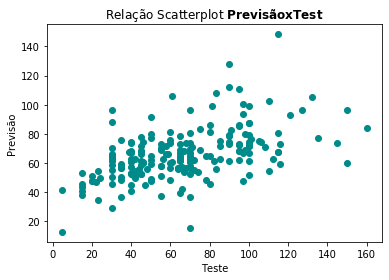

In [38]:
X_cnt = sm.add_constant(X_TesteComp)
Y_predTest = results.predict(X_cnt)

plt.title(r'Relação Scatterplot $\bf{Previsão x Test}$')
plt.xlabel('Teste')
plt.ylabel('Previsão')
plt.scatter(Y_test, Y_predTest, color='darkcyan');